**BIG DATA ECONOMETRIC FINAL EXAM PROJECT**

**DEEPAK KUMAR TIWARI**

**ECG-590**

**NORTH CAROLINA STATE UNIVERSITY**

**FINANCIAL MATHEMATICS, DEC'19**

### Goal of this project is to reduce the Mean squared Error using different Machine Learning and Deep Learning methods


### Takeaway from this project:

1.   Quadratic Model fitted best on this data with MSE of 18%

2.   Random Forest performed better than than the Decision Tree or Linear Regression with all 50 features because of vote of several independent trees in the forest

3. Train Test split is a good method to measure the model accuracy on unseen data but since here out data is small and has only 400 data points, 50% ratio is not good enough we would have as much data used to train the model. only 200 datapoints to train the model is not the best idea

4. There is multicollinearity in the variables but if we lose the variables expecially first 29 variables we are losing alot of information thus MSE increased from 23(Linear Regression when all 50 variables used) to 28(When last 21 variables used). VIF above 10 indicates multicollinearity

5. Ridge Regression with penalty parameter of 1 worked better than the Linear Regression as well as Lasso Regression

6. Lasso Regression is very important method to select the variables as it converges the parameter cofficient to zero at different penalty parameter lambda

7. Lasso Regression chose 20 variables out of 50 variables and MSE also improved from 23% when all 50 variables were used to 20% when only 20 variables were used in the model

8. Artificial Neural Network model redcuced the MSE to 7.1% on training dataset with only 200 points but performing not that good on test dataset. More training dataset might improve the model performance. By cross validation we can train the model on datapoints and also test the model on data but we are not allowed to do that in this exam project.

9. Best subset can be a good algorithm to find best models but when we have too many idependent variables like here we have 50 variables , it becomes computationally unfeasible for 3 predictors only we have 19000 models. We can alternatively use forward, backward or mixed stepwise selection.








### Let's start by importing libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

### Let's get the data file

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Data.csv to Data.csv


In [0]:
import io
ExamData = pd.read_csv(io.BytesIO(uploaded['Data.csv']))

Let's check the data once

In [5]:
ExamData.head()

,y,x01,x02,x03,x04,x05,x06,x07,x08,x09,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50
0,-3.987019,-1.150161,1.919942,-0.200096,-0.144521,-0.482146,-0.960322,-1.817256,-0.650505,-1.263704,-0.504251,-1.096154,1.802635,-0.230030,0.011708,-0.626882,-0.985122,-1.779466,-0.758924,-1.420219,-0.390862,-1.336247,1.981402,-0.029362,-0.329936,-0.371314,-0.948259,-1.925181,-0.517164,-1.255850,-0.429341,-1.425485,0.330591,1.043292,-2.363364,-0.042187,-0.886898,0.385751,0.557676,-0.300189,-1.088644,0.494981,1.685510,0.046713,0.510464,-0.201781,-1.210735,3.319328,-0.338595,-0.943236,-1.757650
1,4.385074,0.202677,1.184966,0.554749,1.440169,0.775009,0.645686,-0.504184,0.410975,-0.027140,-0.512595,0.165817,1.162804,0.704654,1.629204,0.714029,0.783973,-0.468842,0.347445,0.000617,-0.722861,0.243429,1.186604,0.378884,1.489329,0.689081,0.765722,-0.557039,0.286459,-0.104668,-0.567365,1.879087,0.071266,0.717358,-1.154862,1.001935,0.282106,0.547362,-0.876831,1.303607,1.003040,-0.571616,-0.693324,1.375822,0.046313,-0.812161,-2.193061,1.531839,-0.386584,1.425787,-0.632263
2,8.190520,0.821439,1.066287,0.380227,0.115380,-0.057053,-1.254392,0.431652,1.063195,-2.030637,-0.220205,0.935704,1.027793,0.396658,0.153714,-0.110178,-1.375280,0.566920,1.256109,-1.915649,-0.241097,0.902891,0.843571,0.506674,0.312686,-0.019585,-1.297349,0.625716,0.960750,-1.972310,-0.270848,1.280060,-0.359576,-1.892539,-1.231784,2.568725,-1.380979,-1.398547,-0.413629,0.624886,0.311793,-1.382967,0.846960,0.526483,-0.115525,0.191892,0.595478,-0.001111,-0.281005,-0.233176,0.967024
3,0.718460,1.051590,-0.854382,0.460841,-1.645333,2.325046,0.840424,0.032657,0.082418,-0.401942,-0.247423,1.076781,-0.902341,0.460733,-1.702875,2.191417,0.788880,0.140423,-0.107156,-0.338288,-0.243264,1.035097,-0.943996,0.482850,-1.481933,2.159656,0.772691,0.263231,0.275021,-0.286760,-0.272114,-1.008451,1.574559,0.043960,1.886853,-0.068190,0.144135,0.022686,0.222502,0.461644,1.322756,0.755680,1.517992,-0.069339,-1.331750,-0.607552,-1.857216,0.728549,-0.715072,-0.159497,0.079616
4,-7.689298,-1.017523,-0.592204,-0.896561,1.946834,-0.740624,-0.814975,-0.011092,-0.593935,-2.546734,-1.984688,-1.051631,-0.578143,-0.890222,1.821483,-0.815850,-0.747625,-0.122423,-0.779853,-2.687046,-1.933851,-0.887244,-0.537471,-1.022186,2.085057,-0.783898,-0.892138,-0.017255,-0.666547,-2.653598,-1.967448,1.033184,0.335531,1.297757,0.399632,-1.779484,-1.495692,0.880190,0.332199,-0.176873,0.084682,1.162416,0.270168,-1.275362,-0.751303,1.037507,-0.856538,1.722328,-0.108052,1.632677,-0.033254


In [6]:
ExamData.shape

(400, 51)

We can see we have 400 observations and 50 independent variables and 1 target variable y

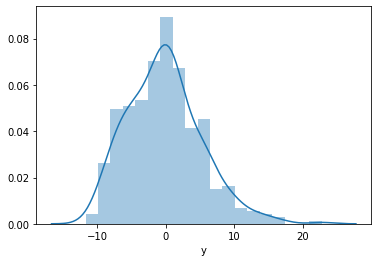

In [19]:
sns.distplot(y)

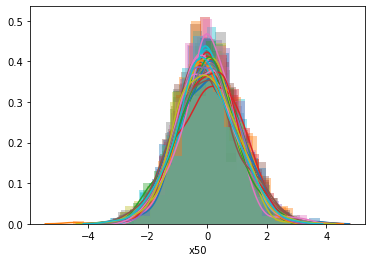

In [23]:
for i in range(50):
  sns.distplot(x.iloc[:,i])

### So, our target variable is continuous with values ranging from -10 to 21 approximately. So, clearly this is a regression problem. Also, almost all predictors ranges from -4 to 4 approx so, we don't really need to scaling like standardization or normalization

### Let's define x and y separately for modeling

In [0]:
x=ExamData.iloc[:,1:]
y=ExamData.iloc[:,0]

We are using Train Test Split with ratio of 50% for one half to be trained and another half to be used to check the model accuracy

In [0]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=1)

### Let's find the outliers by using boxplot method in training data and remove them so, that model doesn't learn from outlier values.

Let's check the outliers by having boxplot distribution of the target variable of trainig dataset only

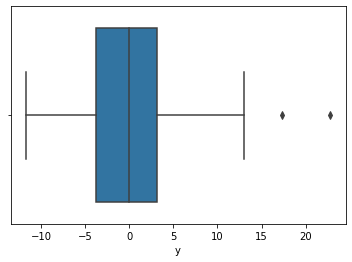

In [9]:
sns.boxplot(y_train)

We can see we have 2 outliers in the training y varaible which falls beyond the 1.5 times of interquartile range 

Let's define the Interquartile range to detect the outliers

In [11]:
Q1 = y_train.quantile(0.25)
Q3 = y_train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

6.881305133


In [12]:
 y_train[y_train > (Q3 + 1.5 * IQR)]

243    17.289235
104    22.790085
Name: y, dtype: float64

We have 2 outliers which is beyond positive 1.5 times of IQR in y_train and thus we would want to remove these two observations from X and Y training so, that model doesn't learn from them

In [13]:
y_train[y_train < (Q1 - 1.5 * IQR)]

Series([], Name: y, dtype: float64)

In [14]:
print(type(y_train),type(X_train))

<class 'pandas.core.series.Series'> <class 'pandas.core.frame.DataFrame'>


In [0]:
y_train.drop([104,243],inplace=True)

In [16]:
y_train.shape

(198,)

In [17]:
X_train.drop([104,243],inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [18]:
X_train.shape

(198, 50)

In [0]:
from sklearn import preprocessing
X_train_scaled = preprocessing.StandardScaler().fit(X_train).transform(X_train)


Goal of this project is to reduce the Mean squared Error using different algorithms so, we would start with Null model and then proceed to simpler algorithms to complex ones

## Null Model

In [30]:
#Null model, only a constant
Null_MSE=((y_test-y_train.mean())**2).mean()
print('Null model',Null_MSE)

Null model 28.907721505285107


### We have Mean Squared Error for Null model that is when we have only constant terms and no variables at all is 28.90

## Linear Model

In [31]:
#Linear model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_pred= lm.predict(X_test)

In [33]:
from sklearn import metrics
print('MSE:', metrics.mean_squared_error(y_test, y_pred))

MSE: 23.782570634177702


### MSE decreased from 28.9 to 23.78 when we are using all the variables in Linear Regression

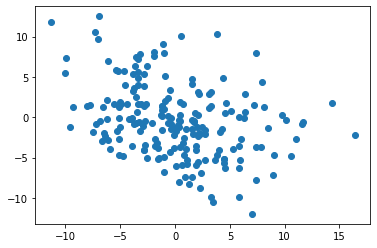

In [34]:
plt.scatter(y_test-y_pred,y_pred)

Since, there is no pattern, linear regression model is good fit for the data

### Let's see the plot of Y vs each of 50 predictors

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


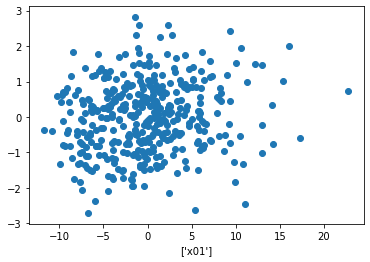

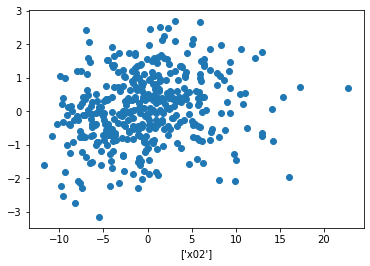

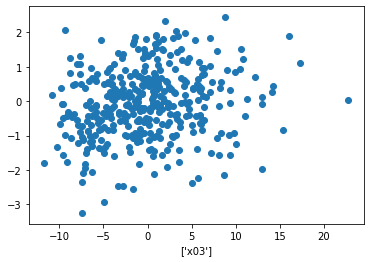

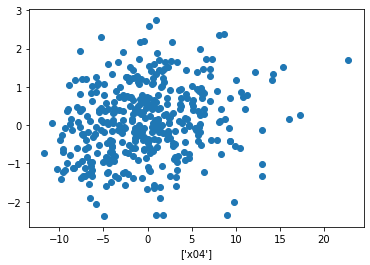

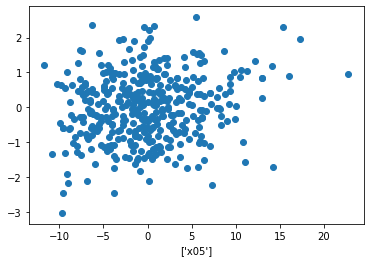

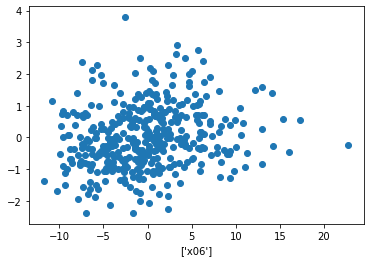

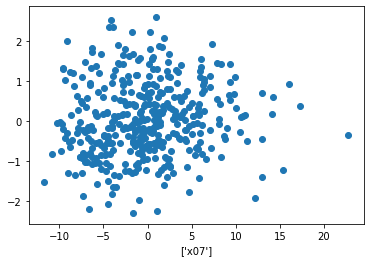

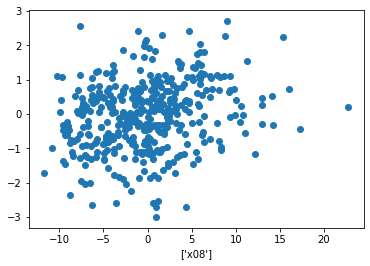

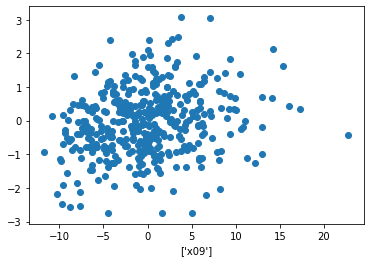

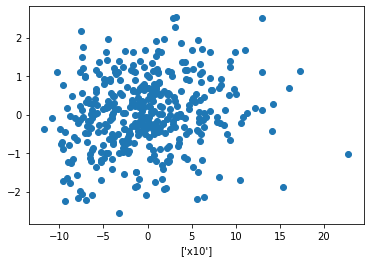

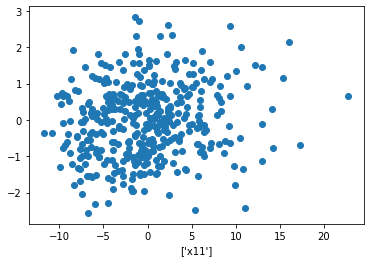

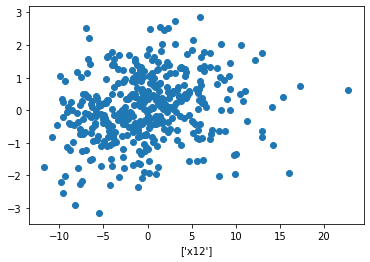

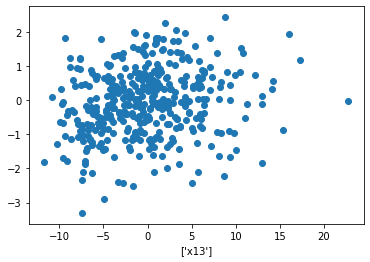

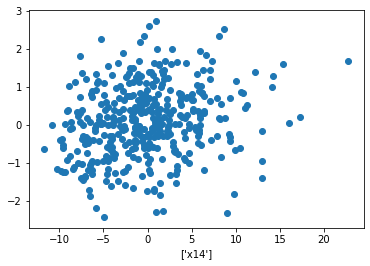

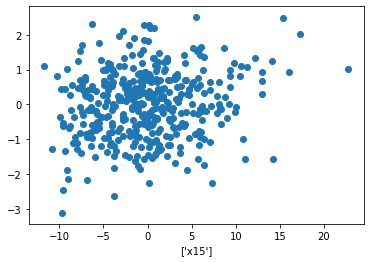

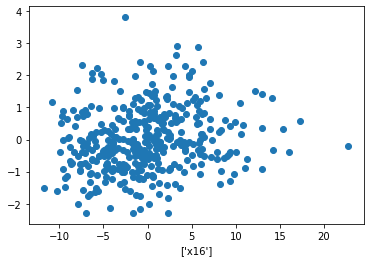

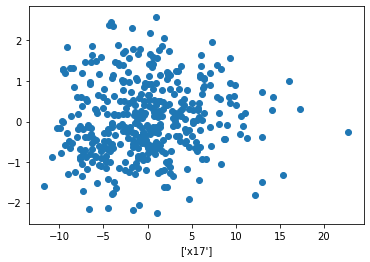

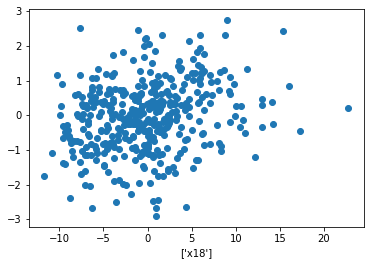

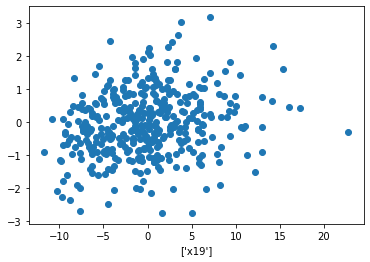

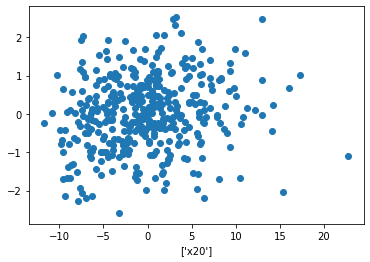

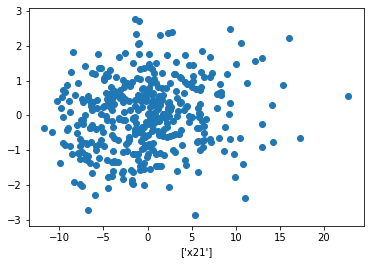

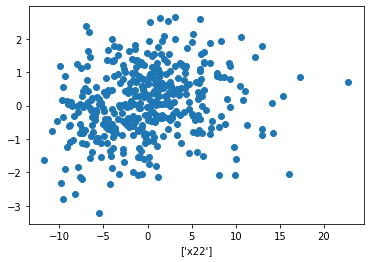

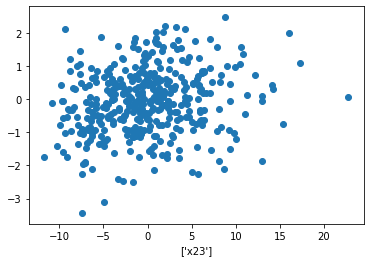

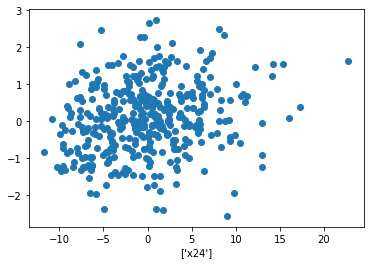

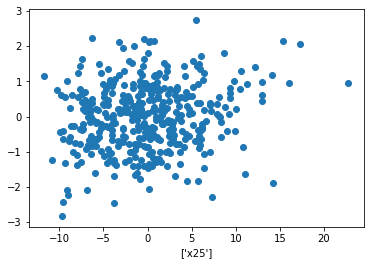

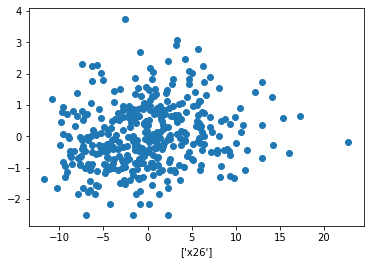

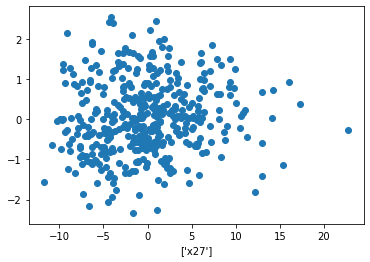

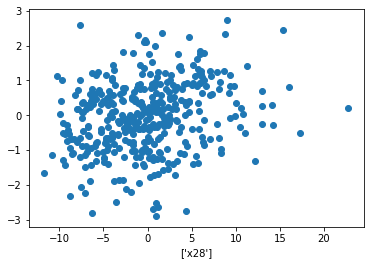

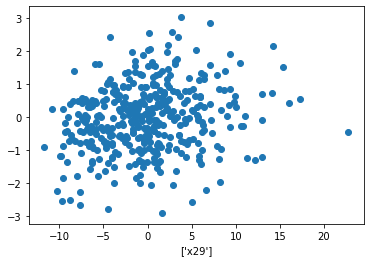

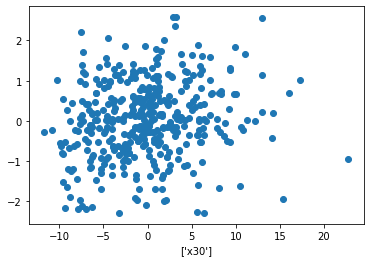

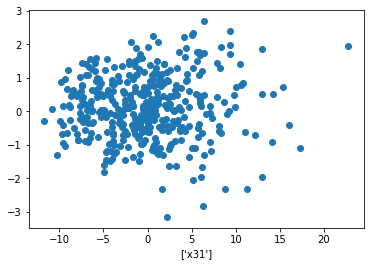

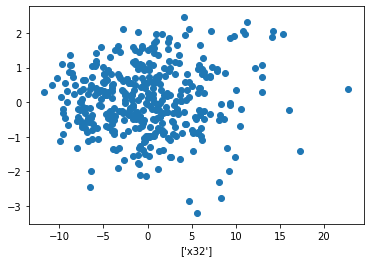

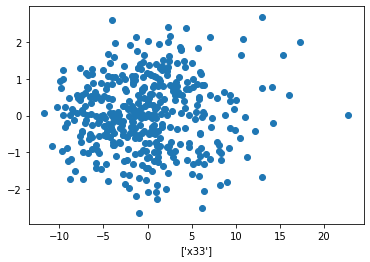

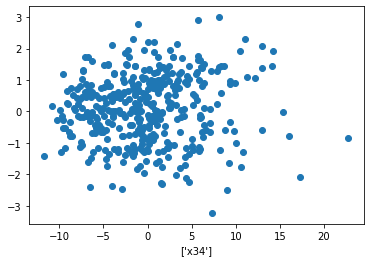

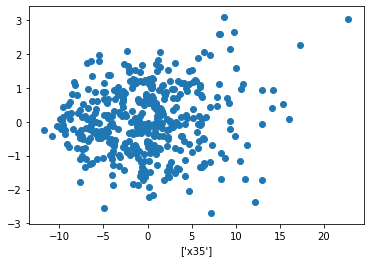

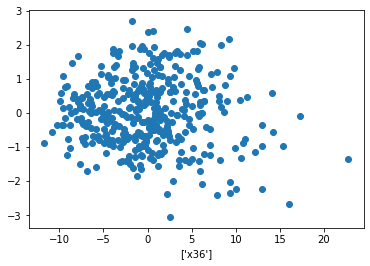

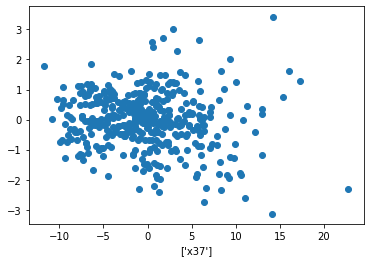

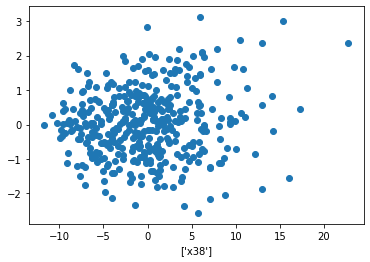

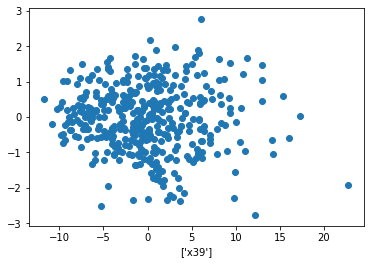

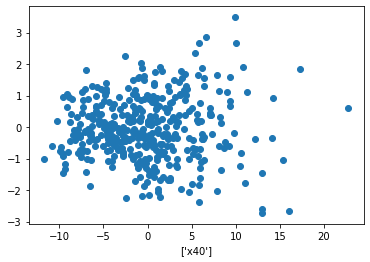

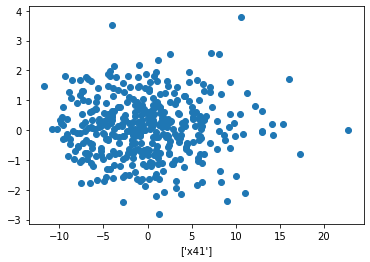

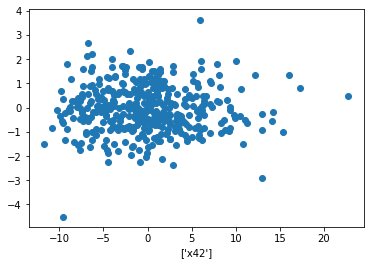

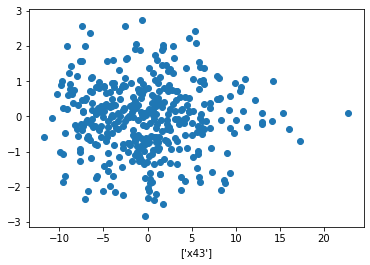

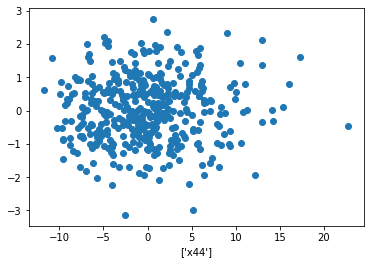

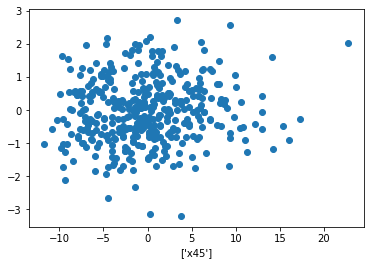

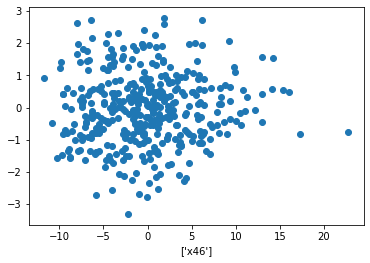

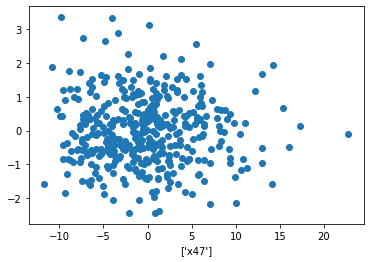

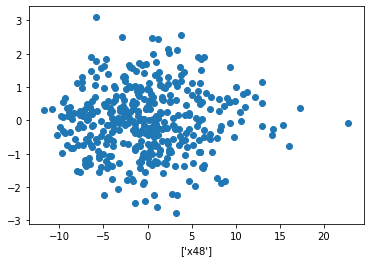

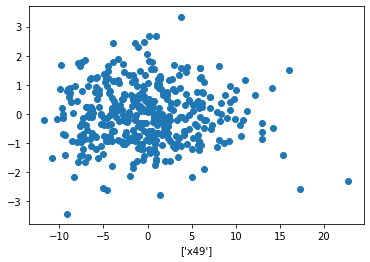

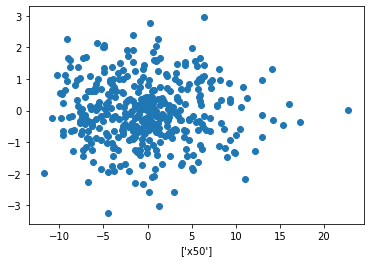

In [35]:
for i in x.columns:
    plt.figure()
    plt.scatter(ExamData['y'],ExamData[i])
    plt.xlabel([i])

### By seeing the plot of each x predictor and target variable y, it looks like each of the predictor contributes some information in the prediction of y

### Let's see if there is multicollinearity among the predictors

In [0]:
#correlation_matrix=x.corr()
#correlation_matrix[correlation_matrix>0.7]
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [37]:
vf=[]
for i in range(x.shape[1]):
    vif=variance_inflation_factor(x.values,i)
    vf.append(vif)
print(vf)
    

[228.23739680781165, 208.6134404078362, 204.1758564663967, 216.8728092202751, 209.1648111033765, 218.93881421883754, 203.213959240962, 205.11312020568704, 234.43372296688415, 190.52145081030676, 114.1277753920412, 107.11963734135139, 123.7630227284136, 111.26405791459301, 111.50367521790403, 118.3957142378508, 108.74463396709767, 111.66262742009825, 112.98989215900447, 95.12739600581183, 114.65341447558805, 119.16593260530172, 102.93091655994863, 106.82970713526485, 99.77598867444435, 121.73801668577076, 107.10447553095682, 99.21960651740532, 111.30749806771529, 101.88780612337115, 1.1390460669950233, 1.1347702521924954, 1.2398367581072212, 1.1229341263807588, 1.1707063537876892, 1.1077722466679816, 1.137746077467074, 1.095952137294243, 1.10650915885381, 1.1413268682287396, 1.129977400756082, 1.1407336726500947, 1.1502384524400628, 1.1870054829515753, 1.1555427286054638, 1.1800239437090227, 1.1180221663554775, 1.1367699872530346, 1.1325418569843526, 1.1824915645718923]


Since, if VIF is more than 10 then it represent multicollinearity. Let's see how many variables has VIF more than 10

In [38]:
vf=pd.DataFrame(vf)
vf[vf<10]

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,NaN


We can see in our variables, only x30 to x50 variables have low VIF around 1 thus no multicollinearity. We are going to use variables only from 30 to 50 in that case

In [39]:
lm.fit(X_train.iloc[:,29:],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
y_pred_1= lm.predict(X_test.iloc[:,29:])
print('MSE:', metrics.mean_squared_error(y_test, y_pred_1))

MSE: 28.270774956447195


### This MSE is worst than even the Linear Regression indicating that by losing the variables from x01 to x29, we are losing much information of y

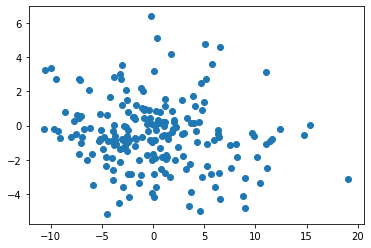

In [41]:
plt.scatter(y_test-y_pred_1,y_pred_1)

Let's fit the same linear model but with first 29 variables instead of last 31 variables and see how model performs

In [42]:
x_2=X_train.iloc[:,:29]
lm.fit(x_2,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
y_pred_2= lm.predict(X_test.iloc[:,:29])
print('MSE:', metrics.mean_squared_error(y_test, y_pred_2))

MSE: 20.50058173101595


### We managed to decrease the MSE to 20.5 incidating that first 29 variables has more information of y than 2nd set of 21 variables

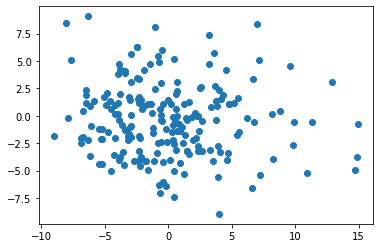

In [44]:
plt.scatter(y_test-y_pred_2,y_pred_2)

Again since there is no clear pattern, linear regression seems to be a good fit for the data

## Quadratic Model

In [45]:
from sklearn.preprocessing import PolynomialFeatures 
  
poly = PolynomialFeatures(degree = 2) 
X_poly = poly.fit_transform(X_train) 
  
poly.fit(X_poly, y_train) 
lm.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
y_pred_3= lm.predict(poly.fit_transform(X_test))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_3))

MSE: 18.733680182554075


### We can see MSE decreased to 18.733% indicating quadratic model is better fit

## Decision Tree Regression

In [0]:
#Let's do Decision Tree regression 
from sklearn.tree import DecisionTreeRegressor

In [0]:
Acc_Decision=[]
for i in range(1,50):
  regr_1 = DecisionTreeRegressor(max_depth=i)
  regr_1.fit(X_train, y_train)
  y_pred_4 = regr_1.predict(X_test)
  MSE=metrics.mean_squared_error(y_test, y_pred_4)
  Acc_Decision.append(MSE)

In [49]:
min(Acc_Decision)

28.36175947896122

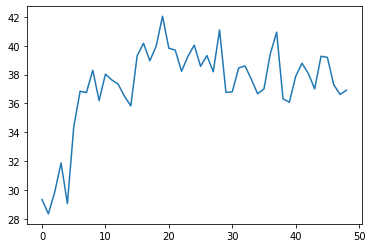

In [50]:
plt.plot(Acc_Decision)

### We tried to use the Decision Tree regression perormance with depth ranging from 1 to 50, is not that great and is infact worst than the Linear regression also. Our aim is to reduce MSE by applying different modeling methods

## Random Forest Regression

In [0]:
from sklearn.ensemble import RandomForestRegressor 
Acc_Random=[]
for i in range(1,200):
  regressor = RandomForestRegressor(n_estimators = i, random_state = 0) 
  regressor.fit(X_train, y_train) 
  y_pred_5=regressor.predict(X_test)
  MSE=metrics.mean_squared_error(y_test, y_pred_5)
  Acc_Random.append(MSE)


In [52]:
min(Acc_Random)

20.279687867097145

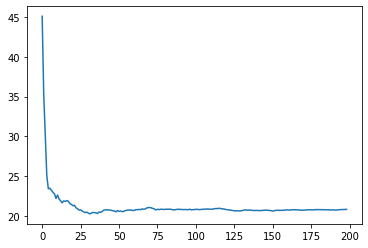

In [53]:
plt.plot(Acc_Random)

### We can see the MSE has reached the minimum MSE of 20.279 and remains constant even if number of decreased

### Ridge Regression

In [0]:
from sklearn.linear_model import Ridge
Acc_Ridge=[]
for i in [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]:
  ridge=Ridge(alpha=i,normalize=True)
  ridge.fit(X_train,y_train)
  y_pred_6=ridge.predict(X_test)
  MSE=metrics.mean_squared_error(y_test, y_pred_6)
  Acc_Ridge.append(MSE)


In [56]:
min(Acc_Ridge)

20.158611518654055

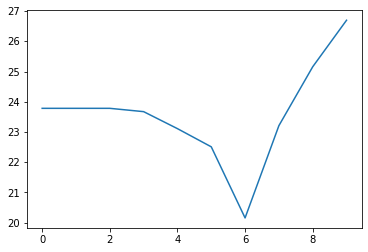

In [63]:
plt.plot(Acc_Ridge)

### Thus Ridge regression has minimum MSE of 20.158 when penalty tuning parameter is 1. Please note that Ridge Regression uses L2 norm to panalize the predictor's cofficient thus can't be used to do variable selection

In [57]:
from sklearn.model_selection import GridSearchCV
parameters={'alpha':[1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}
ridge=Ridge()
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=2)
ridge_regressor.fit(x,y)


GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [58]:
print(ridge_regressor.best_params_, ridge_regressor.best_score_)

{'alpha': 20} -20.571701795778154


#### This Ridge Regression using Grid Search using 2-Fold cross validation is same as Ridge regression on 50% train test split and thus has almost same MSE 

## Lasso Regression

In [0]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

In [66]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

### Let's do the variable selection using LASSO Regression. Lasso uses L1 norm to penalize predictors and thus it can be used to select variables.

In [69]:
sel_ = SelectFromModel(LinearRegression())
sel_.fit(scaler.transform(X_train),y_train)

SelectFromModel(estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                           n_jobs=None, normalize=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [70]:
sel_.get_support()

array([ True, False,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True, False, False,  True, False,  True,
        True, False,  True,  True,  True, False,  True, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

### Those with True values are selected variables by Lasso and one with False has been reduced to 0

### Let's try to build the model using selected Features set

In [0]:
feauture_selected=pd.DataFrame(sel_.get_support(),columns=['feature'])
[feauture_selected['feature']==True]
feature_set=['x01','x02','x03','x04','x05','x06','x07','x09','x10','x11','x12','x15','x17','x18','x20','x21','x22','x24','x26','x29']
x_selected=x[feature_set]

In [74]:
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(x_selected, y, test_size=0.5, random_state=1)
  
lm.fit(X_train_sel, y_train_sel)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [75]:
y_pred_sel= lm.predict(X_test_sel)
print('MSE:', metrics.mean_squared_error(y_test_sel, y_pred_sel))

MSE: 20.76247077216838


### Thus MSE has decreased to 20.76 which is quite improvement but not much. which indicates we have almost same information as Ridge or Linear Regression on first 29 variables. Compared to Linear Regression on all the 50 variables, we had MSE of 23.77 and we are minimizing MSE by decreasing the number of variables from 50 to 20 which is great improvement

In [0]:
#Random Forest on selected features

Acc_Random_sel=[]
for i in range(1,200):
  regressor = RandomForestRegressor(n_estimators = i, random_state = 0) 
  regressor.fit(X_train_sel, y_train_sel) 
  y_pred_sel_random=regressor.predict(X_test_sel)
  MSE=metrics.mean_squared_error(y_test_sel, y_pred_sel_random)
  Acc_Random_sel.append(MSE)

In [77]:
min(Acc_Random_sel)

24.443442944963035

Random Forest on selected Features of 20 predictors is even worst than the random Forest on all 50 features indicatig we are losing information 

### Let's use the Lasso Regression to predict Y and see it's MSE instead of variable selection. Here number of iterations to converge the parameters is 100000

In [78]:
for i in [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]:
  model_lasso = Lasso(alpha=i,max_iter = 100000)
  model_lasso.fit(X_train, y_train) 
  pred_test_lasso= model_lasso.predict(X_test)
  print(metrics.mean_squared_error(y_test,pred_test_lasso))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 482.4626014244915, tolerance: 0.5062479822606639
  positive)


23.782570634178445
23.782570598487528
23.782567066252813
23.747118911414262
23.454660531394467
22.381107314800232
27.480870793917646
28.907721505285117
28.907721505285117
28.907721505285117


MSE isn't decreaing much on even 100000 iterations. This performance is worst than even Ridge Regression

### Let's build a Neural Network model using Keras. This would be Sequantial Feed Forward Neural Network model with activation fucntion as Linear since, this is Regression problem. Loss function used is Mean Squared Error and optmization method used is Stochastic Gradient Descent. 

### Neural Network Model

Let's import all the libraries to build the model

In [0]:
#Neural Network model
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM
from keras.callbacks import Callback
from keras.models import Sequential
from keras.layers import LSTM, Dense, Activation
import pickle
from mpl_toolkits.mplot3d import Axes3D
import sys
from queue import Queue
import json
%matplotlib inline

### Let's use a class to see how Loss is being reduced with each learning from each batch of 72

In [0]:
class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        sys.stdout.write(str(logs.get('loss'))+str(', '))
        sys.stdout.flush()
        self.losses.append(logs.get('loss'))
        
lr = LossHistory()

### Let's define the structure of Neural Network model. Since, we have 50 predictors so, outside layer would have 50 neurons. We would define one hidden layer with 20 neurons and since, there is one y target variable and is a regression problem, output layer containing one 1 neurons. Since, our data is small and has only 200 observations (Note that we are removing outliers in case of Neural Network model from training datset since, it is capable of learning from outliers by backpropagation), we have used epoch size of 1000

In [0]:
number_of_neurons_layer1 = 50
number_of_neurons_layer2 = 20
number_of_neurons_layer3 = 1
number_of_epochs = 1000

In [0]:
dim =  50
samples = 200

In [0]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=1)

In [0]:
# design network
from keras import optimizers
sgd = optimizers.SGD(lr=0.01, clipnorm=1.)

model = Sequential()
model.add(Dense(number_of_neurons_layer1,input_shape=(dim, ), activation='linear'))
model.add(Dense(number_of_neurons_layer2, activation='linear'))
model.add(Dense(number_of_neurons_layer3, activation='linear'))
model.compile(loss='mean_squared_error', optimizer=sgd)

def train(data,label):
    model.fit(data, label, epochs=number_of_epochs, batch_size=72, validation_data=(data, label), verbose=0, shuffle=True,callbacks=[lr])

def score(data):
    return model.predict(data)

In [125]:
train(X_train,y_train)

27.485344, 32.1308, 25.137484, 24.753944, 31.067207, 27.566256, 25.850895, 18.925224, 39.529305, 22.20891, 27.472347, 30.938309, 22.614275, 26.58619, 29.424799, 27.344423, 25.90273, 22.293476, 19.47274, 19.407284, 38.83933, 17.707964, 30.741455, 24.950735, 24.275837, 17.359133, 31.95432, 20.873812, 20.08368, 31.235928, 20.388968, 21.9436, 27.743029, 27.026974, 17.312714, 23.598581, 23.252605, 19.086172, 24.62791, 19.17007, 19.863144, 27.524204, 21.844337, 16.003872, 27.773172, 18.21952, 17.310474, 29.547089, 20.780582, 22.562645, 18.418177, 17.725145, 27.572382, 14.754377, 17.259762, 25.220573, 17.31995, 23.611818, 15.623262, 20.478054, 27.293657, 18.12555, 11.6176815, 20.377302, 21.234518, 15.664042, 14.722938, 22.32869, 20.737818, 22.877464, 15.969079, 17.697596, 18.52833, 15.687229, 22.902803, 24.9646, 15.584499, 14.073174, 17.093061, 21.182234, 16.369112, 24.013258, 15.53009, 14.115275, 21.528952, 17.584845, 14.033898, 24.406464, 14.833286, 13.275225, 19.525656, 17.706858, 15.29988

Text(0.5, 1.0, 'Loss function with Stochastic Gradient Descent Optmization')

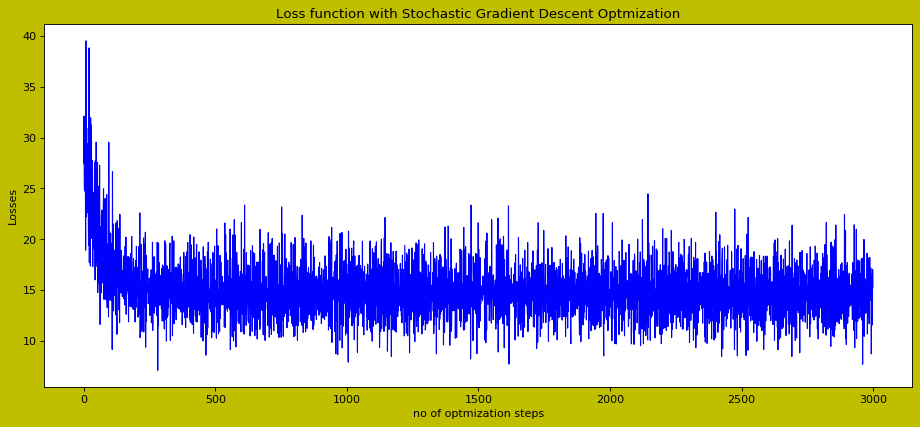

In [126]:
fig, ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='y', edgecolor='k')
size = len(lr.losses)
ax.plot(range(0,size), lr.losses, '-', color='blue', animated = True, linewidth=1)
plt.xlabel('no of optmization steps')
plt.ylabel('Losses')
plt.title('Loss function with Stochastic Gradient Descent Optmization')

### We can see how model's loss is almost constant after 500th batch.

In [127]:
min(lr.losses)

7.1015515

Minimum Loss fucntion we achieved is 7.1 approximately and thus accuracy of 92.9%. But unfortunately this result is on training dataset not on test dataset.

In [131]:
accuracy=100-min(lr.losses)
accuracy

92.89844846725464

In [0]:
y_pred_nn=score(X_test)

In [133]:
print('MSE:', metrics.mean_squared_error(y_test, y_pred_nn))

MSE: 22.9968166253332


### Let's try to do the Best Subset selection

In [0]:
import itertools
import time
import statsmodels.api as sm

In [0]:
def processSubset(feature_set):
  # Fit model on feature_set and calculate MSE
  model = sm.OLS(y_train,X_train)
  regr = model.fit()
  MSE = ((y_test-regr.predict(X_test)) ** 2).mean()
  return {"model":regr, "MSE":MSE}

In [0]:
def getBest(k):
  tic = time.time()
  results = []
  for combo in itertools.combinations(X_train.columns, k):
    results.append(processSubset(combo))
  # Wrap everything up in a nice dataframe
  models = pd.DataFrame(results)
    
  # Choose the model with the minimum MSE
  best_model = models.loc[np.argmin(np.array(models['MSE']))]
  toc = time.time()
  print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    
  # Return the best model, along with some other useful information about the model
  return best_model

In [137]:
models_best = pd.DataFrame(columns=["MSE", "model"])

tic = time.time()
for i in range(3):
    models_best.loc[i] = getBest(i)

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed 1 models on 0 predictors in 0.01231074333190918 seconds.
Processed 50 models on 1 predictors in 0.2919456958770752 seconds.
Processed 1225 models on 2 predictors in 7.10497260093689 seconds.
Total elapsed time: 7.462133884429932 seconds.


In [138]:
print(models_best.loc[1, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.527
Model:                            OLS   Adj. R-squared (uncentered):              0.370
Method:                 Least Squares   F-statistic:                              3.347
Date:                Sat, 14 Dec 2019   Prob (F-statistic):                    7.00e-09
Time:                        20:03:50   Log-Likelihood:                         -547.20
No. Observations:                 200   AIC:                                      1194.
Df Residuals:                     150   BIC:                                      1359.
Df Model:                          50                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [139]:
models_best

,MSE,model
0,24.526909,<statsmodels.regression.linear_model.Regressio...
1,24.526909,<statsmodels.regression.linear_model.Regressio...
2,24.526909,<statsmodels.regression.linear_model.Regressio...
